# R ----> XGBoost Hyperparameter Finetuning

In [6]:
library(readxl)
library(tidyverse)
library(xgboost)
library(caret)
library(xgboost)

Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

<U+221A> ggplot2 3.3.2     <U+221A> purrr   0.3.4
<U+221A> tibble  3.0.3     <U+221A> dplyr   1.0.2
<U+221A> tidyr   1.1.1     <U+221A> stringr 1.4.0
<U+221A> readr   1.3.1     <U+221A> forcats 0.5.0

Warning message:
"package 'stringr' was built under R version 4.0.3"
Warning message:
"package 'forcats' was built under R version 4.0.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'xgboost' was built under R version 4.0.3"

Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice


Warning message:
"package 'caret' was built under R version 4.0.3"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr

In [7]:
data <- read.csv("C:/Users/Eyal Bijaoui/datascience/project/Favorita__dffinal.csv")

In [8]:
head(data)

,X,sumtaransactions,locale_Ibarra,locale_Loja,locale_Manta,locale_Quito,National_Ecuador,maxoil,EQ_Impact,store_pct,...,store_type_B,store_type_C,store_type_D,onpromotion_0,onpromotion_1,MM_1,MM_2,MM_3,MM_12,log_sales
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,1652,0,0,0,0,7,22,0,0.03246823,...,0,0,1,0,0,1,0,0,0,5.509388
2,2,1796,0,0,0,0,7,22,0,0.03295283,...,0,0,1,0,0,1,0,0,0,4.553877
3,3,308,0,0,0,0,7,22,0,0.01717639,...,0,0,1,0,0,1,0,0,0,4.276666
4,4,1927,0,0,0,0,7,22,0,0.03273745,...,0,0,0,0,0,1,0,0,0,5.811141
5,5,808,0,0,0,0,7,22,0,0.02907603,...,0,0,1,0,0,1,0,0,0,3.091042
6,6,778,0,0,0,0,7,22,0,0.03020676,...,0,0,1,0,0,1,0,0,0,4.127134


In [9]:
data<-data[,-c(1)]

In [10]:
vn <- names(data)
vn

[1] "sumtaransactions" "locale_Ibarra"    "locale_Loja"      "locale_Manta"    
 [5] "locale_Quito"     "National_Ecuador" "maxoil"           "EQ_Impact"       
 [9] "store_pct"        "city_pct"         "cluster_pct"      "item_nbr_589403" 
[13] "item_nbr_699745"  "item_nbr_741201"  "item_nbr_804098"  "item_nbr_1110679"
[17] "item_nbr_1247036" "class_2802"       "class_2850"       "class_2854"      
[21] "class_2864"       "store_type_A"     "store_type_B"     "store_type_C"    
[25] "store_type_D"     "onpromotion_0"    "onpromotion_1"    "MM_1"            
[29] "MM_2"             "MM_3"             "MM_12"            "log_sales"

create training set indices with 80% of data by mechkar

In [11]:
require(mechkar)
Table1(data = data,x = vn,y = "log_sales")
tab1 <- train_test(data = data[,vn], train_name = "train", test_name = "test",prop = 0.8, seed = 5, tableone=T)

Loading required package: mechkar

Warning message in Table1(data = data, x = vn, y = "log_sales"):
"The following variables have unique values and will not be included in the analysis: "


  |======================================================================| 100%

Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
The dependent variable has more than 8 levels, table too large!



V1,V2,Pop
<chr>,<chr>,<chr>
Variables,Categories,Population
Individuals,n,18572
sumtaransactions,Mean (SD),"1,609.7 (750.2)"
sumtaransactions,Median (IQR),"1,722.0 (1,025.0-2,271.0)"
sumtaransactions,Missing (%),--
locale_Ibarra,Mean (SD),0.1 (0.3)
locale_Ibarra,Median (IQR),0.0 (0.0-0.0)
locale_Ibarra,Missing (%),--
locale_Loja,Mean (SD),0.1 (0.3)


Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |====================================================================  |  97%

 

You got a perfectly balanced training and test datasets

 



In [12]:
dim(train)
dim(test)

[1] 14857    32

[1] 3715   32

In [13]:
tab1

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,18572,14857,3715,NA
sumtaransactions,Mean (SD),"1,609.7 (750.2)","1,606.3 (751.5)","1,623.1 (744.7)",NA
sumtaransactions,Median (IQR),"1,722.0 (1,025.0-2,271.0)","1,718.0 (1,020.0-2,271.0)","1,745.0 (1,031.5-2,273.5)",0.224
locale_Ibarra,Mean (SD),0.1 (0.3),0.1 (0.3),0.1 (0.2),NA
locale_Ibarra,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.263
locale_Loja,Mean (SD),0.1 (0.3),0.1 (0.3),0.1 (0.3),NA
locale_Loja,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.339
locale_Manta,Mean (SD),0.1 (0.3),0.1 (0.3),0.1 (0.3),NA
locale_Manta,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.915


In [14]:
tab1 %>% filter(pval < 0.05)

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
traintest_ind_,Median (IQR),1.0 (1.0-1.0),NA,NA,0


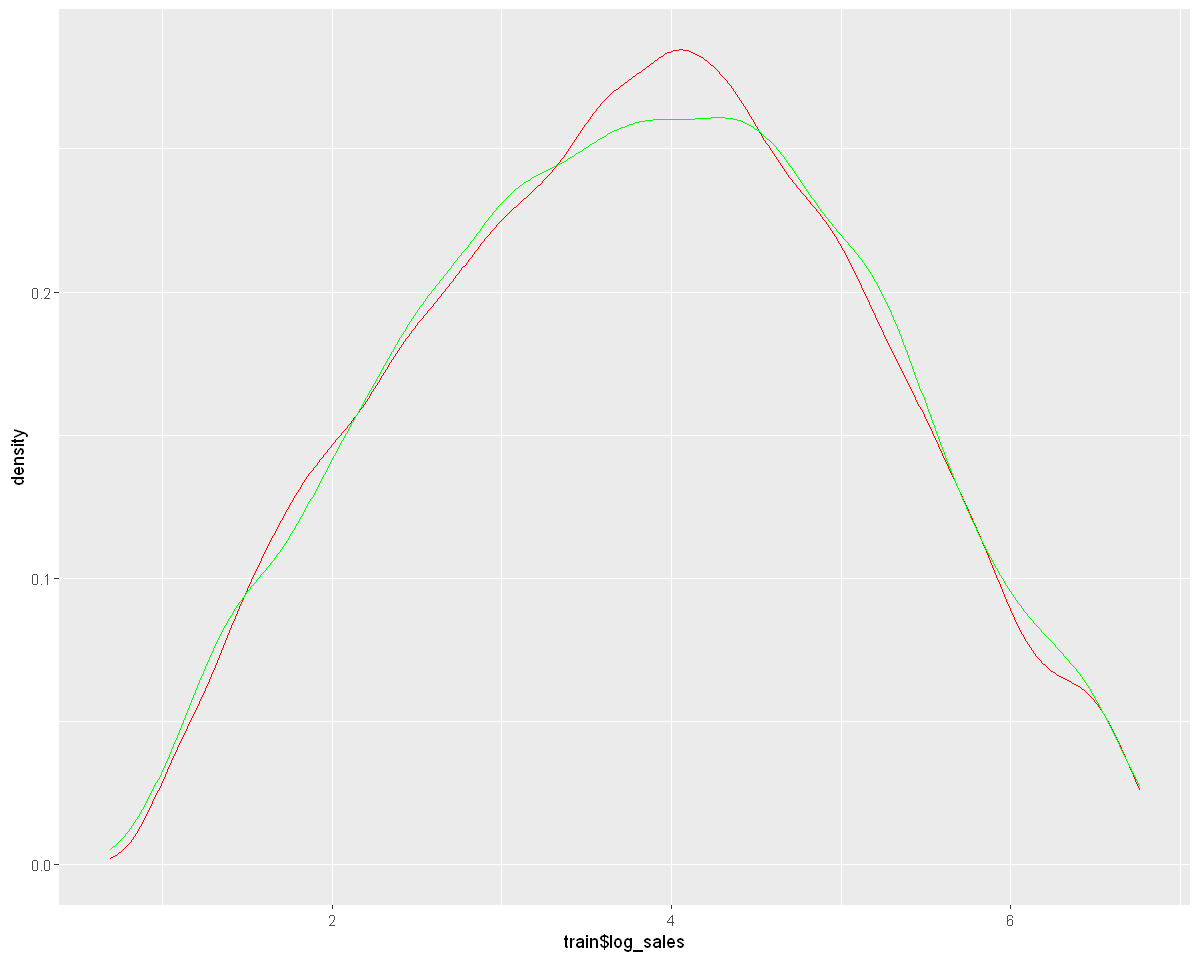

In [15]:
require(ggplot2)

options(repr.plot.width = 10, repr.plot.height = 8)

ggplot() +
    geom_density(aes(x=train$log_sales),color="red",alpha=0.3) +
    geom_density(aes(x=test$log_sales),color="green",alpha=0.3)

In [16]:
# check that all varlables are numeric
summary(data)

 sumtaransactions locale_Ibarra      locale_Loja       locale_Manta    
 Min.   :   1     Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:1025     1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :1722     Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :1610     Mean   :0.06784   Mean   :0.07721   Mean   :0.08901  
 3rd Qu.:2271     3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :2696     Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
  locale_Quito     National_Ecuador     maxoil        EQ_Impact      
 Min.   :0.00000   Min.   : 1.000   Min.   : 1.00   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.: 1.000   1st Qu.: 7.00   1st Qu.:0.00000  
 Median :0.00000   Median : 3.000   Median :10.00   Median :0.00000  
 Mean   :0.07721   Mean   : 4.155   Mean   :11.61   Mean   :0.04351  
 3rd Qu.:0.00000   3rd Qu.: 6.000   3rd Qu.:17.00   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :11.000   Max.   :24.00   Max.   :1.00000  
   sto

Convert the train and test sets into DMatrixes which is the recommended class in xgboost. 
The code is'nt running so just convert to matrix

In [17]:
train1 <- Matrix::sparse.model.matrix(log_sales ~ .-1, data = train)

In [18]:
test1 <- Matrix::sparse.model.matrix(log_sales ~ .-1, data = test)

In [19]:
#X_train <- train1
#y_train <- train$log_sales

#X_test <- test1
#y_test <- test$log_sales

# xgb.DMatrix - not run
#X_train = xgb.DMatrix(as.matrix(train1))
#y_train <- train$log_sales
#X_test <- xgb.DMatrix(as.matrix(test1))
#y_test <- test$log_sales


X_train = as.matrix(train1)
y_train <- train$log_sales
X_test <- as.matrix(test1)
y_test <- test$log_sales

Specify cross-validation method and number of folds. 
Also enable parallel computation

In [21]:
xgb_trcontrol = trainControl(
  method = "cv",
  number = 5,  
  allowParallel = TRUE,
  verboseIter = TRUE,
  returnData = FALSE,
  returnResamp = "all"
)

Random Search: we decide which parameters and how (randomly)

The grid space to search for the best hyperparameters

In [175]:
#mod12 <- xgboost(data=X_train,label=y_train, nrounds=500,print_every_n = 50,max.depth = 10,min_child_weight=6,eta=0.05)

In [176]:
#mod12 generates RMSLE ~ 0.60903 and R^2 ~ 87.8% 

Run Grid Model

In [22]:
xgbGrid <- expand.grid(nrounds = c(100,500,1000,1500), 
                       max_depth = c(5,15,25,30),
                       colsample_bytree = seq(0.5, 0.9, length.out = 5),
                       eta = c(0.05,0.01),
                       gamma=0,
                       min_child_weight = c(3,6,8),
                       subsample = 1                       
                      )

Now we will train the model

In [24]:
set.seed(123) 

grid_xgb_model = train( X_train, y_train,  
  trControl = xgb_trcontrol,
  tuneGrid = xgbGrid,
  method = "xgbTree"
)

+ Fold1: eta=0.01, max_depth= 5, gamma=0, colsample_bytree=0.5, min_child_weight=3, subsample=1, nrounds=1500 
[10:14:27] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
- Fold1: eta=0.01, max_depth= 5, gamma=0, colsample_bytree=0.5, min_child_weight=3, subsample=1, nrounds=1500 
+ Fold1: eta=0.01, max_depth= 5, gamma=0, colsample_bytree=0.5, min_child_weight=6, subsample=1, nrounds=1500 
[10:14:33] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
- Fold1: eta=0.01, max_depth= 5, gamma=0, colsample_bytree=0.5, min_child_weight=6, subsample=1, nrounds=1500 
+ Fold1: eta=0.01, max_depth= 5, gamma=0, colsample_bytree=0.5, min_child_weight=8, subsample=1, nrounds=1500 
[10:14:38] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
- Fold1: eta=0.01, max_depth= 5, gamma=0, colsamp

Selecting tuning parameters
Fitting nrounds = 500, max_depth = 15, eta = 0.05, gamma = 0, colsample_bytree = 0.7, min_child_weight = 8, subsample = 1 on full training set
[14:20:43] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


Best values for hyperparameters

In [25]:
Grid_Model = grid_xgb_model
Grid_Model

eXtreme Gradient Boosting 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 11887, 11886, 11885, 11886, 11884 
Resampling results across tuning parameters:

  eta   max_depth  colsample_bytree  min_child_weight  nrounds  RMSE     
  0.01   5         0.5               3                  100     1.5289906
  0.01   5         0.5               3                  500     0.6655613
  0.01   5         0.5               3                 1000     0.5956730
  0.01   5         0.5               3                 1500     0.5690185
  0.01   5         0.5               6                  100     1.5293275
  0.01   5         0.5               6                  500     0.6649849
  0.01   5         0.5               6                 1000     0.5956285
  0.01   5         0.5               6                 1500     0.5682205
  0.01   5         0.5               8                  100     1.5315379
  0.01   5         0.5               8                  500     0.6650

Model evaluation

In [ ]:
# check the RMSLE on the Test dataset (Grid model pediction )

In [26]:
predicted_grid_model_test = predict(Grid_Model, X_test)
residuals_test = y_test - predicted_grid_model_test
log_residuals_test = log(y_test+1) - log(predicted_grid_model_test+1)
RMSE_Grid_Model_test = sqrt(mean(residuals_test^2))
RMSLE_Grid_Model_test = sqrt(mean(log_residuals_test^2))
cat('The Grid_Model RMSE on the test data is ', round(RMSE_Grid_Model_test ,3),'\n')
cat('The Grid_Model RMSLE on the test data is ', round(RMSLE_Grid_Model_test,3),'\n')

The Grid_Model RMSE on the test data is  0.447 
The Grid_Model RMSLE on the test data is  0.115 


Calculate R-squared

In [27]:
y_test_mean = mean(y_test)

# Calculate total sum of squares
tss =  sum((y_test - y_test_mean)^2 )
residuals = y_test - predicted_grid_model_test
# Calculate residual sum of squares
Rss =  sum(residuals^2)

# Calculate R-squared
Rsq  =  100 * (1 - Rss / tss)
#cat('The R-square of the test data is ', round(rsq,3), '\n')
sprintf("Grid_Model_Test Percent Variance Explained, R^2: %1.1f%%", Rsq)

[1] "Grid_Model_Test Percent Variance Explained, R^2: 88.5%"

In [ ]:
# check the Grid Model RMSLE on the Train dataset  (Grid model pediction )

In [28]:
predicted_grid_model_train = predict(Grid_Model, X_train)
residuals_train = y_train - predicted_grid_model_train
log_residuals_train = log(y_train+1) - log(predicted_grid_model_train+1)
RMSE_Grid_Model_train = sqrt(mean(residuals_train^2))
RMSLE_Grid_Model_train = sqrt(mean(log_residuals_train^2))
cat('The Grid_Model RMSE on the train data is ', round(RMSE_Grid_Model_train ,3),'\n')
cat('The Grid_Model RMSLE on the train data is ', round(RMSLE_Grid_Model_train,3),'\n')

The Grid_Model RMSE on the train data is  0.156 
The Grid_Model RMSLE on the train data is  0.041 


Plotting actual vs predicted

In [29]:
options(repr.plot.width=8, repr.plot.height=4)

`geom_smooth()` using formula 'y ~ x'



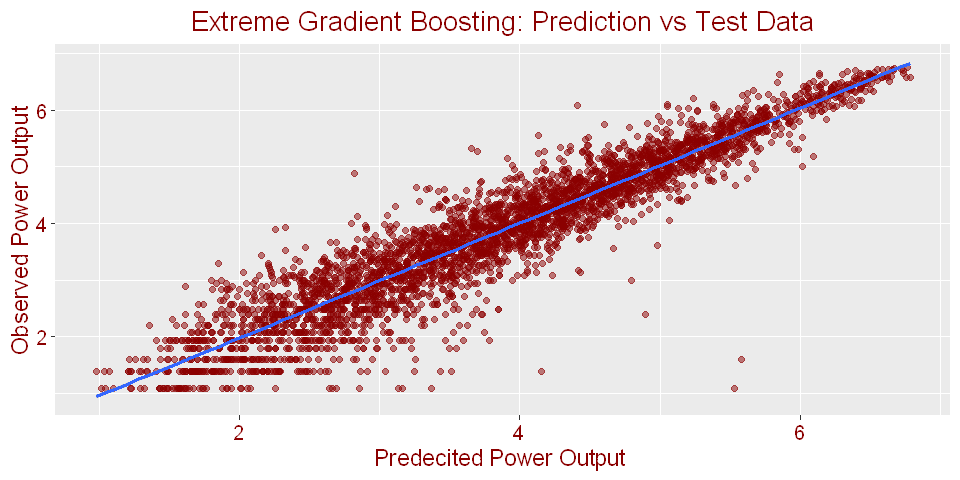

In [30]:
my_data = as.data.frame(cbind(predicted = predicted_grid_model_test,
                            observed = y_test))

# Plot predictions vs test data

ggplot(my_data,aes(predicted, observed)) + geom_point(color = "darkred", alpha = 0.5) + 
    geom_smooth(method=lm)+ ggtitle('Linear Regression ') + ggtitle("Extreme Gradient Boosting: Prediction vs Test Data") +
      xlab("Predecited Power Output ") + ylab("Observed Power Output") + 
        theme(plot.title = element_text(color="darkred",size=16,hjust = 0.5),
         axis.text.y = element_text(color = "darkred",size=12), axis.text.x = element_text(color = "darkred",size=12,hjust=.5),
         axis.title.x = element_text(color = "darkred",size=14), axis.title.y = element_text(color = "darkred",size=14))

Run Base Model

In [31]:
rmse_basemodel_train <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle_basemodel_train <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}

err_res_basemodel_train <- NULL

In [32]:
rmse_basemodel_test <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle_basemodel_test <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}

err_res_basemodel_test <- NULL

In [33]:
X_train = as.matrix(train1)
y_train <- train$log_sales
X_test <- as.matrix(test1)
y_test <- test$log_sales
set.seed(123)
Base_Model<- xgboost(data=X_train,label=y_train, nrounds=500,print_every_n = 50,max.depth = 10,min_child_weight=6,
                eta=0.05)

[1]	train-rmse:3.403838 
[51]	train-rmse:0.543408 
[101]	train-rmse:0.373626 
[151]	train-rmse:0.329404 
[201]	train-rmse:0.305115 
[251]	train-rmse:0.285080 
[301]	train-rmse:0.270984 
[351]	train-rmse:0.257875 
[401]	train-rmse:0.249676 
[451]	train-rmse:0.240819 
[500]	train-rmse:0.234061 


In [ ]:
# Base model prediction on Train

In [34]:
pred_basemodel_train <- predict(Base_Model,newdata=X_train)
rmse_basemodel_train(y_train,pred_basemodel_train)
rmsle_basemodel_train(y_train,pred_basemodel_train)
err_res_basemodel_train <- rbind(err_res_basemodel_train, data.frame(Name="XGBoost", Model="Base_Model", 
                                     RMSE_BaseModel_Train=rmse_basemodel_train(y_train,pred_basemodel_train),
                                     RMSLE_BaseModel_Train=rmsle_basemodel_train(y_train,pred_basemodel_train)))

[1] 0.2340612

[1] 0.06162592

In [ ]:
# Base model prediction on Test

In [35]:
pred_basemodel_test <- predict(Base_Model,newdata=X_test)
rmse_basemodel_test(y_test,pred_basemodel_test)
rmsle_basemodel_test(y_test,pred_basemodel_test)
err_res_basemodel_test <- rbind(err_res_basemodel_test, data.frame(Name="XGBoost", Model="Base_Model", 
                                     RMSE_BaseModel_Test=rmse_basemodel_test(y_test,pred_basemodel_test),
                                     RMSLE_BaseModel_Test=rmsle_basemodel_test(y_test,pred_basemodel_test)))

[1] 0.4688214

[1] 0.1195581

In [36]:
y_test_mean = mean(y_test)

# Calculate total sum of squares
tss =  sum((y_test - y_test_mean)^2 )
residuals_base = y_test - pred_basemodel_test
# Calculate residual sum of squares
Rss_base =  sum(residuals_base^2)

# Calculate R-squared
Rsq_base  =  100 * (1 - Rss_base / tss)
#cat('The R-square of the test data is ', round(rsq,3), '\n')
sprintf("Base_Model Percent Variance Explained, R^2: %1.1f%%", Rsq_base)

[1] "Base_Model Percent Variance Explained, R^2: 87.4%"

In [ ]:
# Compare fine-tunned model to the grid_model

In [ ]:
# Grid search: we decide which parameters and how (not randomly)

First round
xgb_Tuned_Grid <- expand.grid(nrounds = c(450,500,550,600), 
                       max_depth = c(8,10,15,20),
                       colsample_bytree = seq(0.60, 0.75, length.out = 5),
                       eta = c(0.03,0.05,0.06,0.08,0.1),
                       gamma=0,
                       min_child_weight = c(7,8,9,10),
                       subsample = 1                       
                      )

In [37]:
# Secon round

xgb_Tuned_Grid <- expand.grid(nrounds = c(500,525,550), 
                       max_depth = c(10,12,15),
                       colsample_bytree = seq(0.60, 0.75, length.out = 2),
                       eta = c(0.03,0.05,0.06,0.08,0.1),
                       gamma=0,
                       min_child_weight = c(8,9,10),
                       subsample = 1                       
                      )

In [38]:
set.seed(123) 

xgb_model_tune = train( X_train, y_train,  
  trControl = xgb_trcontrol,
  tuneGrid = xgb_Tuned_Grid,
  method = "xgbTree"
)

+ Fold1: eta=0.03, max_depth=10, gamma=0, colsample_bytree=0.60, min_child_weight= 8, subsample=1, nrounds=550 
[14:31:37] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
- Fold1: eta=0.03, max_depth=10, gamma=0, colsample_bytree=0.60, min_child_weight= 8, subsample=1, nrounds=550 
+ Fold1: eta=0.03, max_depth=10, gamma=0, colsample_bytree=0.60, min_child_weight= 9, subsample=1, nrounds=550 
[14:31:42] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
- Fold1: eta=0.03, max_depth=10, gamma=0, colsample_bytree=0.60, min_child_weight= 9, subsample=1, nrounds=550 
+ Fold1: eta=0.03, max_depth=10, gamma=0, colsample_bytree=0.60, min_child_weight=10, subsample=1, nrounds=550 
[14:31:47] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
- Fold1: eta=0.03, max_depth=10, gamma=0, co

Selecting tuning parameters
Fitting nrounds = 550, max_depth = 10, eta = 0.06, gamma = 0, colsample_bytree = 0.6, min_child_weight = 8, subsample = 1 on full training set
[15:16:17] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [39]:
Tuned_Model = xgb_model_tune
Tuned_Model

eXtreme Gradient Boosting 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 11887, 11886, 11885, 11886, 11884 
Resampling results across tuning parameters:

  eta   max_depth  colsample_bytree  min_child_weight  nrounds  RMSE     
  0.03  10         0.60               8                500      0.4656581
  0.03  10         0.60               8                525      0.4648841
  0.03  10         0.60               8                550      0.4639968
  0.03  10         0.60               9                500      0.4671137
  0.03  10         0.60               9                525      0.4663291
  0.03  10         0.60               9                550      0.4654322
  0.03  10         0.60              10                500      0.4673502
  0.03  10         0.60              10                525      0.4664861
  0.03  10         0.60              10                550      0.4655068
  0.03  10         0.75               8                500      0.4682

In [ ]:
# Tuned model prediction on Test

In [40]:

predicted_test = predict(Tuned_Model, X_test)
residuals_test = y_test - predicted_test
log_residuals_test = log(y_test+1) - log(predicted_test+1)
RMSE_model_tune_test=sqrt(mean(residuals_test^2))
RMSLE_model_tune_test = sqrt(mean(log_residuals_test^2))

cat('The Tuned_Model RMSE on the test data is ', round(RMSE_model_tune_test ,3),'\n')
cat('The Tuned_Model RMSLE on the test data is ', round(RMSLE_model_tune_test,3),'\n')


The Tuned_Model RMSE on the test data is  0.439 
The Tuned_Model RMSLE on the test data is  0.112 


In [43]:
sprintf('Tuned Model vs. the Grid_Model Improvement by: %1.1f%%', ( -100 * (RMSLE_model_tune_test - RMSLE_Grid_Model_test) / RMSLE_Grid_Model_test))

[1] "Tuned Model vs. the Grid_Model Improvement by: 2.4%"

In [ ]:
# Calculate R^2

In [44]:
y_test_mean = mean(y_test)

# Calculate total sum of squares
tss =  sum((y_test - y_test_mean)^2 )
residuals = y_test - predicted_test
# Calculate residual sum of squares
Rss =  sum(residuals^2)

# Calculate R-squared
Rsq  =  100 * (1 - Rss / tss)
#cat('The R-square of the test data is ', round(rsq,3), '\n')
sprintf("Tuned Model Percent Variance Explained, R^2: %1.1f%%", Rsq)

[1] "Tuned Model Percent Variance Explained, R^2: 88.9%"

In [ ]:
# Tuned model prediction on Train

In [45]:
predicted_train = predict(Tuned_Model, X_train)
residuals_train = y_train - predicted_train
log_residuals_train = log(y_train+1) - log(predicted_train+1)
RMSE_model_tune_train=sqrt(mean(residuals_train^2))
RMSLE_model_tune_train = sqrt(mean(log_residuals_train^2))

cat('The Tuned_Model RMSE on the train data is ', round(RMSE_model_tune_train ,3),'\n')
cat('The Tuned_Model RMSLE on the train data is ', round(RMSLE_model_tune_train,3),'\n')


The Tuned_Model RMSE on the train data is  0.225 
The Tuned_Model RMSLE on the train data is  0.059 


In [46]:
y_test_mean = mean(y_test)

# Calculate total sum of squares
tss =  sum((y_test - y_test_mean)^2 )
residuals = y_test - predicted_test
# Calculate residual sum of squares
Rss =  sum(residuals^2)

# Calculate R-squared
Rsq  =  100 * (1 - Rss / tss)
#cat('The R-square of the test data is ', round(rsq,3), '\n')
sprintf("Tuned Model Percent Variance Explained, R^2: %1.1f%%", Rsq)

[1] "Tuned Model Percent Variance Explained, R^2: 88.9%"

Plotting actual vs predicted

In [47]:
options(repr.plot.width=8, repr.plot.height=4)

`geom_smooth()` using formula 'y ~ x'



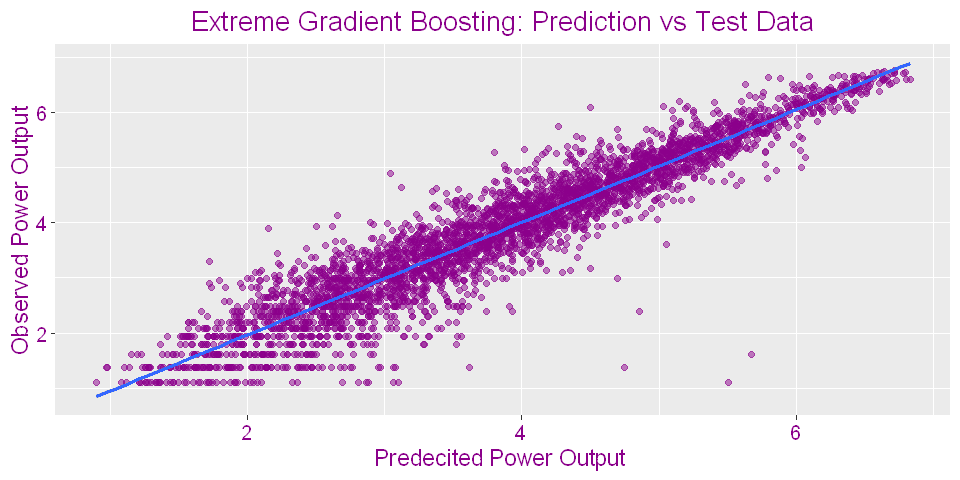

In [48]:
my_data = as.data.frame(cbind(predicted = predicted_test,
                            observed = y_test))

# Plot predictions vs test data

ggplot(my_data,aes(predicted, observed)) + geom_point(color = "Dark magenta", alpha = 0.5) + 
    geom_smooth(method=lm)+ ggtitle('Linear Regression ') + ggtitle("Extreme Gradient Boosting: Prediction vs Test Data") +
      xlab("Predecited Power Output ") + ylab("Observed Power Output") + 
        theme(plot.title = element_text(color="Dark magenta",size=16,hjust = 0.5),
         axis.text.y = element_text(color = "Dark magenta",size=12), axis.text.x = element_text(color = "Dark magenta",size=12,hjust=.5),
         axis.title.x = element_text(color = "Dark magenta",size=14), axis.title.y = element_text(color = "Dark magenta",size=14))

Feature Importance of th Tuned Model

In [49]:
Final_Tuned_Model<-xgboost(data=X_train,label=y_train, nrounds=550,print_every_n = 50,max.depth = 10,gamma=0,
                           colsample_bytree=0.6,min_child_weight=8,eta=0.06,subsample = 1)


[1]	train-rmse:3.377101 
[51]	train-rmse:0.519754 
[101]	train-rmse:0.386973 
[151]	train-rmse:0.328513 
[201]	train-rmse:0.304298 
[251]	train-rmse:0.288974 
[301]	train-rmse:0.275215 
[351]	train-rmse:0.266272 
[401]	train-rmse:0.255658 
[451]	train-rmse:0.247946 
[501]	train-rmse:0.241603 
[550]	train-rmse:0.234838 


In [50]:
importance <- xgb.importance(dimnames(train1)[[2]], model =Final_Tuned_Model)
importance

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
store_pct,0.2318965684,0.1170320461,0.1136584675
onpromotion_1,0.1419485995,0.0251270706,0.0221141589
sumtaransactions,0.1373639436,0.4345563110,0.2086964733
maxoil,0.0650673266,0.0831526802,0.1264623955
cluster_pct,0.0648737656,0.0424388853,0.0825551202
city_pct,0.0439050112,0.0433787743,0.0752750106
onpromotion_0,0.0437879355,0.0143002254,0.0389500024
class_2854,0.0345501925,0.0153033729,0.0127944856
class_2802,0.0329401659,0.0270534985,0.0142863887


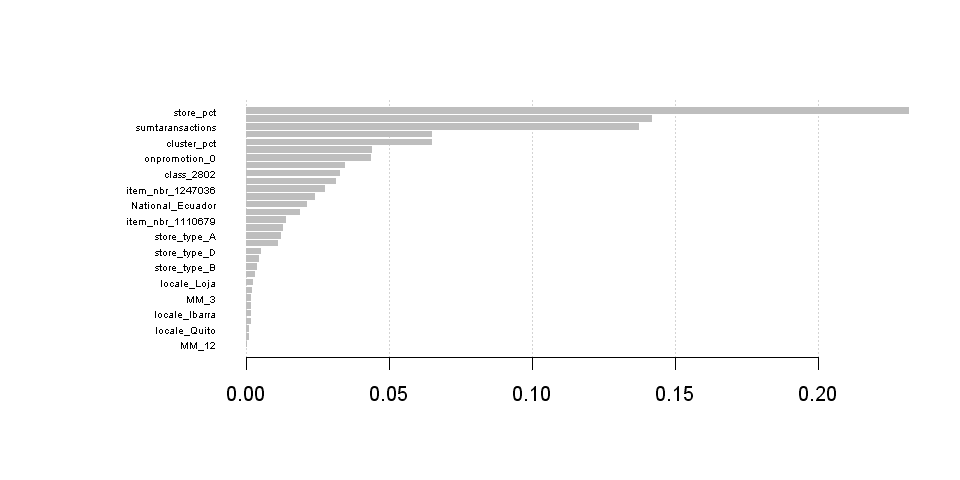

In [51]:
mat <- xgb.importance (feature_names = colnames(X_train),model = Final_Tuned_Model)
xgb.plot.importance (importance_matrix = mat[1:31]) 

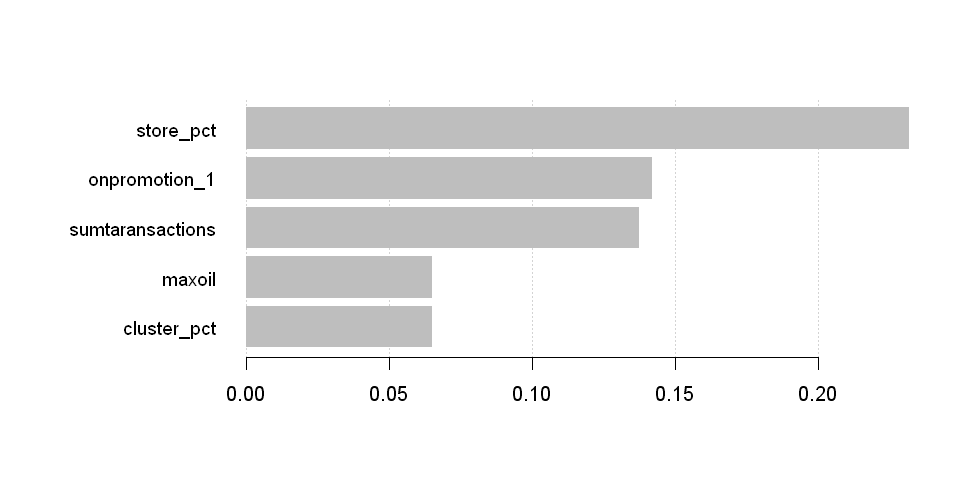

In [52]:
mat <- xgb.importance (feature_names = colnames(X_train),model = Final_Tuned_Model)
xgb.plot.importance (importance_matrix = mat[1:5]) 

Prediction vs. Y on Test dataset

In [53]:
X_test <- as.matrix(test1)
y_test <- test$log_sales

pred_tuned <- predict(Tuned_Model,newdata=X_test)

Pred_Results<-data.frame(y_test)
Pred_Results<-cbind(Pred_Results,data.frame(pred_tuned))
Pred_Results$Sales<-exp(y_test)
Pred_Results$Predict_Sales<-exp(pred_tuned)
Pred_Results


y_test,pred_tuned,Sales,Predict_Sales
<dbl>,<dbl>,<dbl>,<dbl>
1.945910,2.446622,7,11.54927
6.406880,6.122190,606,455.86216
4.382027,4.294022,80,73.26050
6.635947,5.798364,762,329.75953
4.595120,5.135858,99,170.01014
5.087596,4.383431,162,80.11246
5.988961,6.125779,399,457.50082
5.978886,6.059638,395,428.22020
3.178054,3.688807,24,39.99712


`geom_smooth()` using formula 'y ~ x'



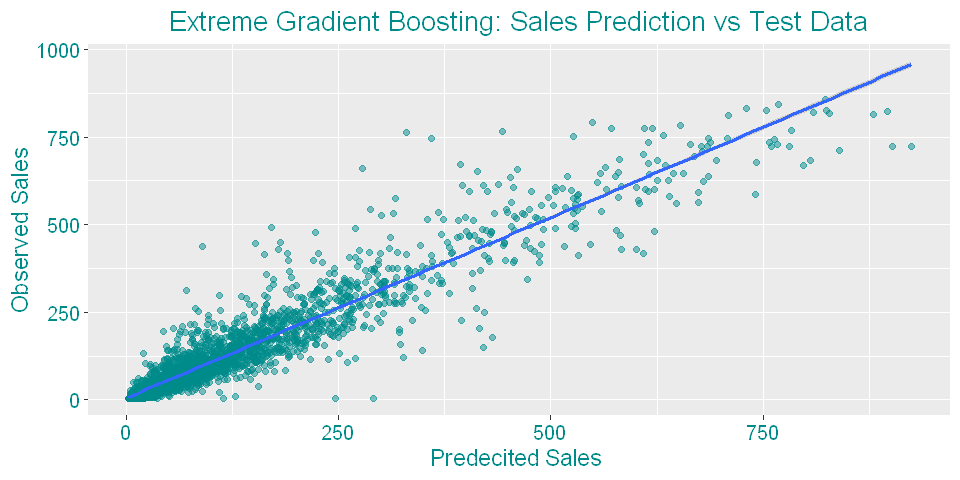

In [54]:
# Plot Sales Prediction  vs Sales in the Test Dataset

ggplot(my_data,aes(Pred_Results$Predict_Sales, Pred_Results$Sales)) + geom_point(color = "Dark cyan", alpha = 0.5) + 
    geom_smooth(method=lm)+ ggtitle('Linear Regression ') + ggtitle("Extreme Gradient Boosting: Sales Prediction vs Test Data") +
      xlab("Predecited Sales ") + ylab("Observed Sales") + 
        theme(plot.title = element_text(color="Dark cyan",size=16,hjust = 0.5),
         axis.text.y = element_text(color="Dark cyan",size=12), axis.text.x = element_text(color="Dark cyan",size=12,hjust=.5),
         axis.title.x = element_text(color="Dark cyan",size=14), axis.title.y = element_text(color="Dark cyan",size=14))

In [ ]:
# for further checks

In [55]:
write.csv(Pred_Results,"C:/Users/Eyal Bijaoui/datascience/project/Test_Pred_Results.csv", row.names = TRUE)

In [1]:
# Predict monthly sales - Test dataset

In [56]:
Pred_Results1<-cbind(Pred_Results,data.frame(test))
Pred_Results1<-data.frame(Pred_Results1)
head(Pred_Results1)


,y_test,pred_tuned,Sales,Predict_Sales,sumtaransactions,locale_Ibarra,locale_Loja,locale_Manta,locale_Quito,National_Ecuador,...,store_type_B,store_type_C,store_type_D,onpromotion_0,onpromotion_1,MM_1,MM_2,MM_3,MM_12,log_sales
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
14,1.945910,2.446622,7,11.54927,305,0,0,0,0,7,...,0,0,1,0,0,1,0,0,0,1.945910
15,6.406880,6.122190,606,455.86216,2498,0,0,0,0,7,...,0,0,0,0,0,1,0,0,0,6.406880
19,4.382027,4.294022,80,73.26050,2480,0,0,0,0,7,...,0,0,0,0,0,1,0,0,0,4.382027
33,6.635947,5.798364,762,329.75953,2480,0,0,0,0,7,...,0,0,0,0,0,1,0,0,0,6.635947
36,4.595120,5.135858,99,170.01014,1385,0,0,0,0,7,...,0,0,1,0,0,1,0,0,0,4.595120
37,5.087596,4.383431,162,80.11246,2309,0,0,0,0,7,...,0,0,0,0,0,1,0,0,0,5.087596


In [57]:
key<-data.frame(rownames(Pred_Results1))


In [58]:
colnames(key)

[1] "rownames.Pred_Results1."

In [59]:
temp<- cbind(Pred_Results1,key)
head(temp)

,y_test,pred_tuned,Sales,Predict_Sales,sumtaransactions,locale_Ibarra,locale_Loja,locale_Manta,locale_Quito,National_Ecuador,...,store_type_C,store_type_D,onpromotion_0,onpromotion_1,MM_1,MM_2,MM_3,MM_12,log_sales,rownames.Pred_Results1.
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
14,1.945910,2.446622,7,11.54927,305,0,0,0,0,7,...,0,1,0,0,1,0,0,0,1.945910,14
15,6.406880,6.122190,606,455.86216,2498,0,0,0,0,7,...,0,0,0,0,1,0,0,0,6.406880,15
19,4.382027,4.294022,80,73.26050,2480,0,0,0,0,7,...,0,0,0,0,1,0,0,0,4.382027,19
33,6.635947,5.798364,762,329.75953,2480,0,0,0,0,7,...,0,0,0,0,1,0,0,0,6.635947,33
36,4.595120,5.135858,99,170.01014,1385,0,0,0,0,7,...,0,1,0,0,1,0,0,0,4.595120,36
37,5.087596,4.383431,162,80.11246,2309,0,0,0,0,7,...,0,0,0,0,1,0,0,0,5.087596,37


In [4]:
Origin <- read.csv("C:/Users/Eyal Bijaoui/datascience/project/Favorita__df6.csv")
head(Origin)

,X,sumtaransactions,locale_Ambato,locale_Cayambe,locale_Cuenca,locale_El_Carmen,locale_Esmeraldas,locale_Guaranda,locale_Guayaquil,locale_Ibarra,...,MM_2,MM_3,MM_4,MM_5,MM_6,MM_7,MM_8,MM_10,MM_11,MM_12
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1652,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1796,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,308,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1927,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,808,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,778,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
temp<-left_join(Pred_Results1, Origin)
colnames(temp)
dim(temp)

Joining, by = c("sumtaransactions", "locale_Ibarra", "locale_Loja", "locale_Manta", "locale_Quito", "National_Ecuador", "maxoil", "EQ_Impact", "store_pct", "city_pct", "cluster_pct", "item_nbr_589403", "item_nbr_699745", "item_nbr_741201", "item_nbr_804098", "item_nbr_1110679", "item_nbr_1247036", "class_2802", "class_2850", "class_2854", "class_2864", "store_type_A", "store_type_B", "store_type_C", "store_type_D", "onpromotion_0", "onpromotion_1", "MM_1", "MM_2", "MM_3", "MM_12", "log_sales")



[1] "y_test"                                 
 [2] "pred_tuned"                             
 [3] "Sales"                                  
 [4] "Predict_Sales"                          
 [5] "sumtaransactions"                       
 [6] "locale_Ibarra"                          
 [7] "locale_Loja"                            
 [8] "locale_Manta"                           
 [9] "locale_Quito"                           
[10] "National_Ecuador"                       
[11] "maxoil"                                 
[12] "EQ_Impact"                              
[13] "store_pct"                              
[14] "city_pct"                               
[15] "cluster_pct"                            
[16] "item_nbr_589403"                        
[17] "item_nbr_699745"                        
[18] "item_nbr_741201"                        
[19] "item_nbr_804098"                        
[20] "item_nbr_1110679"                       
[21] "item_nbr_1247036"                       
[22] "class_2802"                             
[23] "class_2850"                             
[24] "class_2854"                             
[25] "class_2864"                             
[26] "store_type_A"                           
[27] "store_type_B"                           
[28] "store_type_C"                           
[29] "store_type_D"                           
[30] "onpromotion_0"                          
[31] "onpromotion_1"                          
[32] "MM_1"                                   
[33] "MM_2"                                   
[34] "MM_3"                                   
[35] "MM_12"                                  
[36] "log_sales"                              
[37] "X"                                      
[38] "locale_Ambato"                          
[39] "locale_Cayambe"                         
[40] "locale_Cuenca"                          
[41] "locale_El_Carmen"                       
[42] "locale_Esmeraldas"                      
[43] "locale_Guaranda"                        
[44] "locale_Guayaquil"                       
[45] "locale_Latacunga"                       
[46] "locale_Libertad"                        
[47] "locale_Machala"                         
[48] "locale_Puyo"                            
[49] "locale_Quevedo"                         
[50] "locale_Riobamba"                        
[51] "locale_Salinas"                         
[52] "locale_Santo_Domingo"                   
[53] "Regional_Cotopaxi"                      
[54] "Regional_Imbabura"                      
[55] "Regional_Santa_Elena"                   
[56] "Regional_Santo_Domingo_de_los_Tsachilas"
[57] "averageoil"                             
[58] "minoil"                                 
[59] "state_pct"                              
[60] "item_nbr_695758"                        
[61] "MM_4"                                   
[62] "MM_5"                                   
[63] "MM_6"                                   
[64] "MM_7"                                   
[65] "MM_8"                                   
[66] "MM_10"                                  
[67] "MM_11"

[1] 3715   67

In [ ]:
# for further checks and summary monthly sales vs predicted monthly sales (in Excel)

In [61]:
write.csv(temp,"C:/Users/Eyal Bijaoui/datascience/project/Test_Pred_Results_All1.csv", row.names = TRUE)